In [1]:
sc

from pyspark.sql import SQLContext,Row
from pyspark import SparkConf,SparkContext
import numpy as np
import pandas as pd

rdd=sc.textFile("file:///home/cloudera/Downloads/house_prices_advanced_regression/train.csv")   



In [2]:
header=rdd.first()

In [3]:
rddheader = rdd.first()
header = sc.parallelize([rddheader])
rdddata = rdd.subtract(header)

In [4]:
#rdddata.take(1)

In [5]:
def func(line):
    l1=line.split(",")
    return Row(Id=l1[0],MSSubClass=l1[1],MSZoning=l1[2],LotFrontage=str(l1[3]),
               LotArea=float(l1[4]),Street=l1[5],Alley=l1[6],
               LotShape=l1[7],LandContour=l1[8],Utilities=l1[9],LotConfig=l1[10],
               LandSlope=l1[11],Neighborhood=l1[12],Condition1=l1[13],Condition2=l1[14],BldgType=l1[15],
               HouseStyle=l1[16],OverallQual=l1[17],OverallCond=l1[18],YearBuilt=l1[19],YearRemodAdd=l1[20],
               RoofStyle=l1[21],RoofMatl=l1[22],Exterior1st=l1[23],Exterior2nd=l1[24],MasVnrType=l1[25],
               MasVnrArea=l1[26],ExterQual=l1[27],ExterCond=l1[28],Foundation=l1[29],BsmtQual=l1[30],
               BsmtCond=l1[31],BsmtExposure=l1[32],BsmtFinType1=l1[33],BsmtFinSF1=str(l1[34]),BsmtFinType2=l1[35],
               BsmtFinSF2=float(l1[36]),BsmtUnfSF=float(l1[37]),TotalBsmtSF=float(l1[38]),Heating=l1[39],HeatingQC=l1[40],
               CentralAir=l1[41],Electrical=l1[42],firstFlrSF=float(l1[43]),secondFlrSF=float(l1[44]),LowQualFinSF=l1[45],
               GrLivArea=float(l1[46]),BsmtFullBath=float(l1[47]),BsmtHalfBath=float(l1[48]),FullBath=float(l1[49]),
               HalfBath=float(l1[50]),BedroomAbvGr=float(l1[51]),KitchenAbvGr=float(l1[52]),KitchenQual=l1[53],
               TotRmsAbvGrd=float(l1[54]),Functional=l1[55],Fireplaces=float(l1[56]),
               FireplaceQu=l1[57],GarageType=l1[58],GarageYrBlt=l1[59],GarageFinish=l1[60],
               GarageCars=float(l1[61]),GarageArea=float(l1[62]),GarageQual=l1[63],GarageCond=l1[64],PavedDrive=l1[65],
               WoodDeckSF=float(l1[66]),OpenPorchSF=float(l1[67]),EnclosedPorch=float(l1[68]),threeSsnPorch=float(l1[69]),
               ScreenPorch=float(l1[70]),PoolArea=float(l1[71]),PoolQC=l1[72],Fence=l1[73],MiscFeature=l1[74],
               MiscVal=float(l1[75]),MoSold=l1[76],YrSold=l1[77],SaleType=l1[78],SaleCondition=l1[79],SalePrice=float(l1[80]))
 

In [6]:
res=rdddata.map(func)

In [7]:
res.take(2)

[Row(Alley=u'NA', BedroomAbvGr=3.0, BldgType=u'1Fam', BsmtCond=u'TA', BsmtExposure=u'Av', BsmtFinSF1='1162', BsmtFinSF2=0.0, BsmtFinType1=u'ALQ', BsmtFinType2=u'Unf', BsmtFullBath=0.0, BsmtHalfBath=0.0, BsmtQual=u'Gd', BsmtUnfSF=426.0, CentralAir=u'Y', Condition1=u'Norm', Condition2=u'Norm', Electrical=u'SBrkr', EnclosedPorch=0.0, ExterCond=u'TA', ExterQual=u'Gd', Exterior1st=u'VinylSd', Exterior2nd=u'VinylSd', Fence=u'NA', FireplaceQu=u'NA', Fireplaces=0.0, Foundation=u'PConc', FullBath=2.0, Functional=u'Typ', GarageArea=472.0, GarageCars=2.0, GarageCond=u'TA', GarageFinish=u'RFn', GarageQual=u'TA', GarageType=u'Attchd', GarageYrBlt=u'1999', GrLivArea=1588.0, HalfBath=0.0, Heating=u'GasA', HeatingQC=u'Ex', HouseStyle=u'1Story', Id=u'97', KitchenAbvGr=1.0, KitchenQual=u'Gd', LandContour=u'Lvl', LandSlope=u'Gtl', LotArea=10264.0, LotConfig=u'Inside', LotFrontage='78', LotShape=u'IR1', LowQualFinSF=u'0', MSSubClass=u'20', MSZoning=u'RL', MasVnrArea=u'183', MasVnrType=u'BrkFace', MiscFeat

In [8]:
sqlcontext=SQLContext(sc)

In [9]:
temp=sqlcontext.createDataFrame(res)

In [10]:
temp.registerTempTable("temp_table")

In [11]:
sqlcontext.sql("select * from temp_table")

DataFrame[Alley: string, BedroomAbvGr: double, BldgType: string, BsmtCond: string, BsmtExposure: string, BsmtFinSF1: string, BsmtFinSF2: double, BsmtFinType1: string, BsmtFinType2: string, BsmtFullBath: double, BsmtHalfBath: double, BsmtQual: string, BsmtUnfSF: double, CentralAir: string, Condition1: string, Condition2: string, Electrical: string, EnclosedPorch: double, ExterCond: string, ExterQual: string, Exterior1st: string, Exterior2nd: string, Fence: string, FireplaceQu: string, Fireplaces: double, Foundation: string, FullBath: double, Functional: string, GarageArea: double, GarageCars: double, GarageCond: string, GarageFinish: string, GarageQual: string, GarageType: string, GarageYrBlt: string, GrLivArea: double, HalfBath: double, Heating: string, HeatingQC: string, HouseStyle: string, Id: string, KitchenAbvGr: double, KitchenQual: string, LandContour: string, LandSlope: string, LotArea: double, LotConfig: string, LotFrontage: string, LotShape: string, LowQualFinSF: string, MSSub

In [12]:
result=sqlcontext.sql("select count(*) from temp_table").show()

+----+
| _c0|
+----+
|1460|
+----+



In [13]:
temp.printSchema()

root
 |-- Alley: string (nullable = true)
 |-- BedroomAbvGr: double (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- BsmtCond: string (nullable = true)
 |-- BsmtExposure: string (nullable = true)
 |-- BsmtFinSF1: string (nullable = true)
 |-- BsmtFinSF2: double (nullable = true)
 |-- BsmtFinType1: string (nullable = true)
 |-- BsmtFinType2: string (nullable = true)
 |-- BsmtFullBath: double (nullable = true)
 |-- BsmtHalfBath: double (nullable = true)
 |-- BsmtQual: string (nullable = true)
 |-- BsmtUnfSF: double (nullable = true)
 |-- CentralAir: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- Electrical: string (nullable = true)
 |-- EnclosedPorch: double (nullable = true)
 |-- ExterCond: string (nullable = true)
 |-- ExterQual: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |-- Exterior2nd: string (nullable = true)
 |-- Fence: string (nullable = true)
 |-- FireplaceQu: string (nulla

In [14]:
#Counting the number of rows 
print("Number of Rows : "+str(temp.count()))

Number of Rows : 1460


In [15]:
temp.show(20)

+-----+------------+--------+--------+------------+----------+----------+------------+------------+------------+------------+--------+---------+----------+----------+----------+----------+-------------+---------+---------+-----------+-----------+-----+-----------+----------+----------+--------+----------+----------+----------+----------+------------+----------+----------+-----------+---------+--------+-------+---------+----------+----+------------+-----------+-----------+---------+-------+---------+-----------+--------+------------+----------+--------+----------+----------+-----------+-------+------+------------+-----------+-----------+-----------+----------+--------+------+--------+---------+-------------+---------+--------+-----------+------+------------+-----------+---------+----------+---------+------------+------+----------+-----------+-------------+
|Alley|BedroomAbvGr|BldgType|BsmtCond|BsmtExposure|BsmtFinSF1|BsmtFinSF2|BsmtFinType1|BsmtFinType2|BsmtFullBath|BsmtHalfBath|BsmtQua

In [16]:
#Continue
#df=temp.toPandas()
temp.columns

['Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SalePrice',
 'Sal

In [17]:
#For Dropping columns having more than 60% as NA
#temp.groupBy(temp.columns[0]).count().show(5)
#temp.filter(temp.groupBy(temp.columns[0]).count()[temp.columns[0]] > 1000).show()
temp_dict={}
for i in range(0,len(temp.columns)):
    temp_dict[temp.columns[i]]=temp.groupBy(temp.columns[i]).count().first()[1],temp.groupBy(temp.columns[i]).count().first()[0]
    

In [18]:
temp_dict

{'Alley': (1369, u'NA'),
 'BedroomAbvGr': (50, 1.0),
 'BldgType': (31, u'2fmCon'),
 'BsmtCond': (37, u'NA'),
 'BsmtExposure': (38, u'NA'),
 'BsmtFinSF1': (1, u'943'),
 'BsmtFinSF2': (2, 712.0),
 'BsmtFinType1': (37, u'NA'),
 'BsmtFinType2': (38, u'NA'),
 'BsmtFullBath': (588, 1.0),
 'BsmtHalfBath': (80, 1.0),
 'BsmtQual': (37, u'NA'),
 'BsmtUnfSF': (1, 462.0),
 'CentralAir': (95, u'N'),
 'Condition1': (48, u'Artery'),
 'Condition2': (2, u'Artery'),
 'Electrical': (1, u'NA'),
 'EnclosedPorch': (2, 234.0),
 'ExterCond': (146, u'Gd'),
 'ExterQual': (488, u'Gd'),
 'Exterior1st': (1, u'AsphShn'),
 'Exterior2nd': (60, u'CmentBd'),
 'Fence': (1179, u'NA'),
 'FireplaceQu': (690, u'NA'),
 'Fireplaces': (650, 1.0),
 'Foundation': (24, u'Slab'),
 'FullBath': (650, 1.0),
 'Functional': (15, u'Mod'),
 'GarageArea': (2, 234.0),
 'GarageCars': (369, 1.0),
 'GarageCond': (81, u'NA'),
 'GarageFinish': (81, u'NA'),
 'GarageQual': (81, u'NA'),
 'GarageType': (81, u'NA'),
 'GarageYrBlt': (2, u'1918'),
 'G

In [19]:
temp.groupBy('BldgType').count().collect() #,temp.groupBy('B;dgType').count().first()[0]

[Row(BldgType=u'2fmCon', count=31),
 Row(BldgType=u'Duplex', count=52),
 Row(BldgType=u'TwnhsE', count=114),
 Row(BldgType=u'1Fam', count=1220),
 Row(BldgType=u'Twnhs', count=43)]

In [20]:
l=[]
for key in temp_dict.keys():
    if temp_dict[key][0]>1000:
        l.append(key)
    else:
        continue

In [21]:
l

['LandSlope',
 'KitchenAbvGr',
 'MiscFeature',
 'Utilities',
 'PoolQC',
 'Fence',
 'SaleCondition',
 'Alley',
 'RoofStyle',
 'Street']

In [22]:
for col in l:
    print(str(temp.groupBy(col).count().show()))
    #print(temp_dict[col])

+---------+-----+
|LandSlope|count|
+---------+-----+
|      Gtl| 1382|
|      Mod|   65|
|      Sev|   13|
+---------+-----+

None
+------------+-----+
|KitchenAbvGr|count|
+------------+-----+
|         1.0| 1392|
|         3.0|    2|
|         0.0|    1|
|         2.0|   65|
+------------+-----+

None
+-----------+-----+
|MiscFeature|count|
+-----------+-----+
|         NA| 1406|
|       Gar2|    2|
|       TenC|    1|
|       Shed|   49|
|       Othr|    2|
+-----------+-----+

None
+---------+-----+
|Utilities|count|
+---------+-----+
|   AllPub| 1459|
|   NoSeWa|    1|
+---------+-----+

None
+------+-----+
|PoolQC|count|
+------+-----+
|    NA| 1453|
|    Gd|    3|
|    Ex|    2|
|    Fa|    2|
+------+-----+

None
+-----+-----+
|Fence|count|
+-----+-----+
|   NA| 1179|
| MnWw|   11|
|GdPrv|   59|
| GdWo|   54|
|MnPrv|  157|
+-----+-----+

None
+-------------+-----+
|SaleCondition|count|
+-------------+-----+
|       Normal| 1198|
|       Family|   20|
|      Partial|  125|
|   

In [23]:
#Dropping columns having same values for most instances
for col in l:
    temp=temp.drop(col)
#Total 10 columns dropped

In [24]:
print("Total Number of columns:"+" "+str(len(temp.columns)))

Total Number of columns: 71


In [118]:
l

['LandSlope',
 'KitchenAbvGr',
 'MiscFeature',
 'Utilities',
 'PoolQC',
 'Fence',
 'SaleCondition',
 'Alley',
 'RoofStyle',
 'Street']

AnalysisException: u"cannot resolve 'LandSlope' given input columns: [BsmtExposure_categorical, ScreenPorch, GarageFinish, GarageType_categorical, HouseStyle_categorical, KitchenQual, LandContour, RoofMatl_categorical, BsmtQual, Heating_categorical, Exterior1st_categorical, BsmtFinSF2, RoofMatl, GarageType, Condition2, Exterior2nd, GarageQual_categorical, TotRmsAbvGrd, Condition2_categorical, KitchenQual_categorical, CentralAir_categorical, BsmtFinType2, LotConfig, OverallCond, YearRemodAdd, FireplaceQu_categorical, HeatingQC, LotShape_categorical, ExterCond, MSZoning, Electrical, CentralAir, SaleType_categorical, FullBath, Condition1_categorical, BsmtExposure, LowQualFinSF, FireplaceQu, BsmtFullBath, BsmtFinSF1, Electrical_categorical, SaleType, HalfBath, ExterQual, MasVnrType_categorical, MoSold, LotArea, LotShape, GrLivArea, threeSsnPorch, OpenPorchSF, Exterior1st, GarageYrBlt_categorical, LotConfig_categorical, HouseStyle, Exterior2nd_categorical, Functional_categorical, Functional, GarageQual, GarageCond, BsmtQual_categorical, BsmtCond_categorical, YearBuilt_categorical, LotFrontage, BldgType_categorical, MasVnrType, YearBuilt, WoodDeckSF, YrSold, GarageCars, GarageYrBlt, MasVnrArea, Neighborhood, EnclosedPorch, PavedDrive, MSSubClass, Heating, BsmtUnfSF, SalePrice, OverallQual, Fireplaces, BedroomAbvGr, YrSold_categorical, Foundation_categorical, Foundation, GarageArea, BsmtHalfBath, GarageCond_categorical, Condition1, PoolArea, TotalBsmtSF, BsmtFinType2_categorical, BsmtFinType1_categorical, BldgType, LandContour_categorical, ExterQual_categorical, Id, ExterCond_categorical, firstFlrSF, MSZoning_categorical, HeatingQC_categorical, Neighborhood_categorical, MiscVal, YearRemodAdd_categorical, PavedDrive_categorical, BsmtCond, BsmtFinType1, GarageFinish_categorical, secondFlrSF];"

In [25]:
temp.toPandas()

,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,...,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,firstFlrSF,secondFlrSF,threeSsnPorch
0,3.0,1Fam,TA,Av,1162,0.0,ALQ,Unf,0.0,0.0,...,0.0,6.0,1588.0,158.0,1999,1999,2006,1588.0,0.0,0.0
1,3.0,1Fam,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,0.0,10.0,1482.0,0.0,2007,2007,2007,1482.0,1092.0,0.0
2,3.0,1Fam,TA,No,902,0.0,ALQ,Unf,1.0,0.0,...,0.0,6.0,1098.0,0.0,1955,1955,2008,1098.0,0.0,0.0
3,3.0,1Fam,TA,Gd,125,1031.0,LwQ,ALQ,1.0,0.0,...,0.0,9.0,1192.0,220.0,1974,2003,2007,1516.0,651.0,0.0
4,3.0,TwnhsE,TA,No,874,0.0,ALQ,Unf,1.0,0.0,...,0.0,6.0,1142.0,536.0,1976,1976,2007,1142.0,0.0,0.0
5,4.0,2fmCon,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,0.0,9.0,1020.0,0.0,1910,1950,2006,908.0,1020.0,0.0
6,3.0,1Fam,TA,No,643,0.0,GLQ,Unf,1.0,0.0,...,0.0,6.0,810.0,0.0,2001,2001,2009,810.0,855.0,0.0
7,2.0,1Fam,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,0.0,6.0,1498.0,0.0,2008,2008,2008,1506.0,0.0,0.0
8,3.0,1Fam,TA,No,750,0.0,GLQ,Unf,1.0,0.0,...,0.0,8.0,1050.0,156.0,1993,1994,2010,1062.0,887.0,0.0
9,2.0,1Fam,TA,Mn,348,0.0,ALQ,Unf,1.0,0.0,...,0.0,5.0,528.0,0.0,1920,2002,2007,605.0,0.0,0.0


In [26]:
#temp.show(1,truncate=True)

In [27]:
temp.toPandas()

,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,...,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,firstFlrSF,secondFlrSF,threeSsnPorch
0,3.0,1Fam,TA,Av,1162,0.0,ALQ,Unf,0.0,0.0,...,0.0,6.0,1588.0,158.0,1999,1999,2006,1588.0,0.0,0.0
1,3.0,1Fam,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,0.0,10.0,1482.0,0.0,2007,2007,2007,1482.0,1092.0,0.0
2,3.0,1Fam,TA,No,902,0.0,ALQ,Unf,1.0,0.0,...,0.0,6.0,1098.0,0.0,1955,1955,2008,1098.0,0.0,0.0
3,3.0,1Fam,TA,Gd,125,1031.0,LwQ,ALQ,1.0,0.0,...,0.0,9.0,1192.0,220.0,1974,2003,2007,1516.0,651.0,0.0
4,3.0,TwnhsE,TA,No,874,0.0,ALQ,Unf,1.0,0.0,...,0.0,6.0,1142.0,536.0,1976,1976,2007,1142.0,0.0,0.0
5,4.0,2fmCon,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,0.0,9.0,1020.0,0.0,1910,1950,2006,908.0,1020.0,0.0
6,3.0,1Fam,TA,No,643,0.0,GLQ,Unf,1.0,0.0,...,0.0,6.0,810.0,0.0,2001,2001,2009,810.0,855.0,0.0
7,2.0,1Fam,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,0.0,6.0,1498.0,0.0,2008,2008,2008,1506.0,0.0,0.0
8,3.0,1Fam,TA,No,750,0.0,GLQ,Unf,1.0,0.0,...,0.0,8.0,1050.0,156.0,1993,1994,2010,1062.0,887.0,0.0
9,2.0,1Fam,TA,Mn,348,0.0,ALQ,Unf,1.0,0.0,...,0.0,5.0,528.0,0.0,1920,2002,2007,605.0,0.0,0.0


In [28]:
#temp.registerTempTable("new_temp")

In [29]:
#sqlcontext.sql("select * from new_temp")

In [30]:
#df=temp.toPandas()#.iloc[1:,:]

In [31]:
#temp=sqlcontext.createDataFrame(df)

In [32]:
type(temp)

pyspark.sql.dataframe.DataFrame

In [33]:
temp.count()

1460

In [34]:
temp.toPandas().head(5)

,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,...,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,firstFlrSF,secondFlrSF,threeSsnPorch
0,3.0,1Fam,TA,Av,1162,0.0,ALQ,Unf,0.0,0.0,...,0.0,6.0,1588.0,158.0,1999,1999,2006,1588.0,0.0,0.0
1,3.0,1Fam,TA,No,0,0.0,Unf,Unf,0.0,0.0,...,0.0,10.0,1482.0,0.0,2007,2007,2007,1482.0,1092.0,0.0
2,3.0,1Fam,TA,No,902,0.0,ALQ,Unf,1.0,0.0,...,0.0,6.0,1098.0,0.0,1955,1955,2008,1098.0,0.0,0.0
3,3.0,1Fam,TA,Gd,125,1031.0,LwQ,ALQ,1.0,0.0,...,0.0,9.0,1192.0,220.0,1974,2003,2007,1516.0,651.0,0.0
4,3.0,TwnhsE,TA,No,874,0.0,ALQ,Unf,1.0,0.0,...,0.0,6.0,1142.0,536.0,1976,1976,2007,1142.0,0.0,0.0


In [35]:
temp.groupBy('LotFrontage').count().show()

+-----------+-----+
|LotFrontage|count|
+-----------+-----+
|        174|    2|
|         NA|  259|
|        110|    6|
|        111|    1|
|        112|    1|
|        114|    2|
|         50|   57|
|        115|    2|
|        116|    2|
|         51|   15|
|         52|   14|
|         53|   10|
|        118|    2|
|         54|    6|
|         55|   17|
|         56|    5|
|         57|   12|
|         58|    7|
|         59|   13|
|        182|    1|
+-----------+-----+
only showing top 20 rows



In [36]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder

In [37]:
NA_cols=[]
for col in temp_dict.keys():
    if 'NA' in temp_dict[col]:
        NA_cols.append(col)
    else:
        continue
        

In [38]:
k=list(set(NA_cols)-set(l))

In [39]:
temp.select(k[0]).distinct().show()

+----------+
|MasVnrType|
+----------+
|        NA|
|    BrkCmn|
|     Stone|
|   BrkFace|
|      None|
+----------+



In [40]:
#Remove rows with NA values in MasVnrType
temp.registerTempTable("new_temp")
sqlcontext.sql("select MasVnrType,MasVnrArea from new_temp where MasVnrType='NA'").toPandas()

,MasVnrType,MasVnrArea
0,NA,NA
1,NA,NA
2,NA,NA
3,NA,NA
4,NA,NA
5,NA,NA
6,NA,NA
7,NA,NA


In [41]:
temp.select(k[5]).distinct().show()

+------------+
|BsmtExposure|
+------------+
|          NA|
|          Mn|
|          Gd|
|          No|
|          Av|
+------------+



In [42]:
#Remove rows with NA values in Electrical -Just 1 row
temp.registerTempTable("new_temp")
sqlcontext.sql("select Electrical,CentralAir,HeatingQC ,SalePrice from new_temp where Electrical='NA'").toPandas()

,Electrical,CentralAir,HeatingQC,SalePrice
0,NA,Y,Gd,167500.0


In [43]:
temp.select(k[10]).distinct().show()

+------------+
|BsmtFinType1|
+------------+
|          NA|
|         BLQ|
|         GLQ|
|         ALQ|
|         Unf|
|         LwQ|
|         Rec|
+------------+



In [44]:
#Remove rows with NA values in Electrical -Just 1 row
temp.registerTempTable("new_temp")
clean_temp=sqlcontext.sql("select * from (select * from new_temp where MasVnrType!='NA') as s where s.Electrical!='NA'")

In [45]:
#All NA values treated in columns which did not have any data
#Remaining NA values will be treated as seperate category

In [46]:
#clean_temp.select(clean_temp.columns[3])

In [47]:

#clean_temp1=clean_temp.select(clean_temp.BedroomAbvGr.cast('float'))

In [48]:
clean_temp.select('MiscVal').show()#

+-------+
|MiscVal|
+-------+
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
|    0.0|
+-------+
only showing top 20 rows



In [49]:
num_cols=['BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GrLivArea','HalfBath','Id','LotArea','LotFrontage','LowQualFinSF','MSSubClass','MasVnrArea','MiscVal','MoSold','OpenPorchSF','OverallCond','OverallQual','PoolArea','SalePrice','ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF','firstFlrSF','secondFlrSF','threeSsnPorch']

In [50]:
categoricalcols=[]
for col in clean_temp.columns:
    if col in num_cols:
        pass
    else:
        categoricalcols.append(col)

In [51]:
#clean_temp.select(clean_temp.dtypes[71][0]).toPandas()

In [52]:
clean_temp.dtypes

[('BedroomAbvGr', 'double'),
 ('BldgType', 'string'),
 ('BsmtCond', 'string'),
 ('BsmtExposure', 'string'),
 ('BsmtFinSF1', 'string'),
 ('BsmtFinSF2', 'double'),
 ('BsmtFinType1', 'string'),
 ('BsmtFinType2', 'string'),
 ('BsmtFullBath', 'double'),
 ('BsmtHalfBath', 'double'),
 ('BsmtQual', 'string'),
 ('BsmtUnfSF', 'double'),
 ('CentralAir', 'string'),
 ('Condition1', 'string'),
 ('Condition2', 'string'),
 ('Electrical', 'string'),
 ('EnclosedPorch', 'double'),
 ('ExterCond', 'string'),
 ('ExterQual', 'string'),
 ('Exterior1st', 'string'),
 ('Exterior2nd', 'string'),
 ('FireplaceQu', 'string'),
 ('Fireplaces', 'double'),
 ('Foundation', 'string'),
 ('FullBath', 'double'),
 ('Functional', 'string'),
 ('GarageArea', 'double'),
 ('GarageCars', 'double'),
 ('GarageCond', 'string'),
 ('GarageFinish', 'string'),
 ('GarageQual', 'string'),
 ('GarageType', 'string'),
 ('GarageYrBlt', 'string'),
 ('GrLivArea', 'double'),
 ('HalfBath', 'double'),
 ('Heating', 'string'),
 ('HeatingQC', 'string')

In [53]:
from pyspark.sql.types import DoubleType


In [54]:
#changedTypedf = clean_temp.withColumn(categoricalcols[0],join)

In [55]:
flag=0
for col in categoricalcols:
    if flag != 1:
        indexer = StringIndexer(inputCol=col, outputCol=col+"_categorical").fit(clean_temp)
        indexed_df = indexer.transform(clean_temp)
        #indexed_df.drop("bar").show()
        #indexed_df.toPandas()
        flag=1
    else:
        indexer = StringIndexer(inputCol=col, outputCol=col+"_categorical").fit(indexed_df)
        indexed_df = indexer.transform(indexed_df)

In [56]:
indexed_df.select(['BsmtExposure','BsmtExposure_categorical']).distinct().toPandas()

,BsmtExposure,BsmtExposure_categorical
0,NA,4.0
1,Mn,3.0
2,Gd,2.0
3,Av,1.0
4,No,0.0


In [57]:
#clean_temp.select(clean_temp.cast('float'))

In [58]:
#Use indexed_df for further analysis

In [59]:
#Remove NA values from LotFrontage
#Remove duplicate columns after we have created the categorical columns
#Start plotting using matplotlib

In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [61]:
import seaborn as sns

In [62]:
df=indexed_df.toPandas()

In [63]:
indexed_df.groupBy(categoricalcols[0]).count().toPandas()

,BldgType,count
0,2fmCon,31
1,Duplex,52
2,TwnhsE,113
3,1Fam,1212
4,Twnhs,43


In [64]:
drop_list=['LotFrontage']

In [65]:
temp_df=indexed_df.select([column for column in indexed_df.columns if column not in drop_list])

In [66]:
df=temp_df.toPandas()

In [67]:
df.columns[0:20]

Index([u'BedroomAbvGr', u'BldgType', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtFinType1', u'BsmtFinType2',
       u'BsmtFullBath', u'BsmtHalfBath', u'BsmtQual', u'BsmtUnfSF',
       u'CentralAir', u'Condition1', u'Condition2', u'Electrical',
       u'EnclosedPorch', u'ExterCond', u'ExterQual', u'Exterior1st'],
      dtype='object')

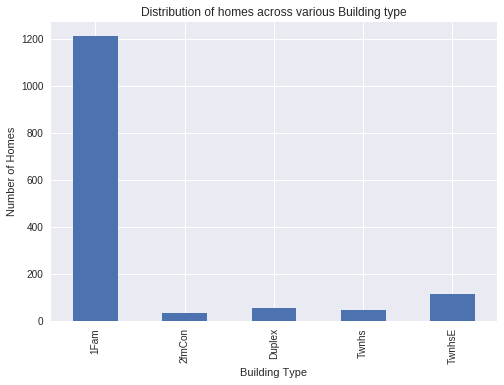

In [68]:
#Dropping BldgType since most of the values belong to "1Fam" category
df.groupby('BldgType').count().iloc[:,1].plot(kind='bar')
plt.xlabel("Building Type")
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

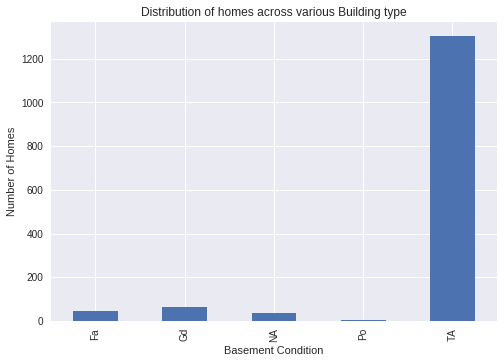

In [69]:
df.groupby('BsmtCond').count().iloc[:,1].plot(kind='bar')
plt.xlabel("Basement Condition")
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

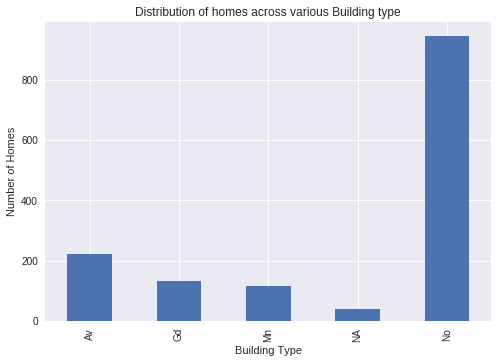

In [70]:
df.groupby('BsmtExposure').count().iloc[:,1].plot(kind='bar')
plt.xlabel("Building Type")
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

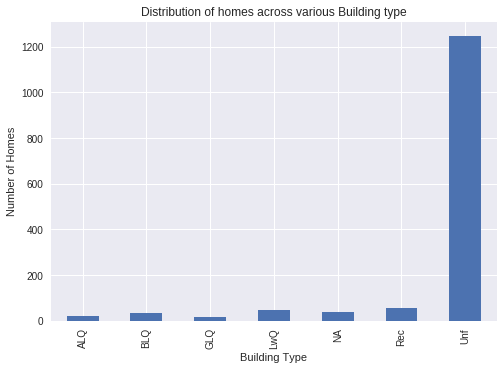

In [71]:
df.groupby('BsmtFinType2').count().iloc[:,1].plot(kind='bar')
plt.xlabel("Building Type")
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

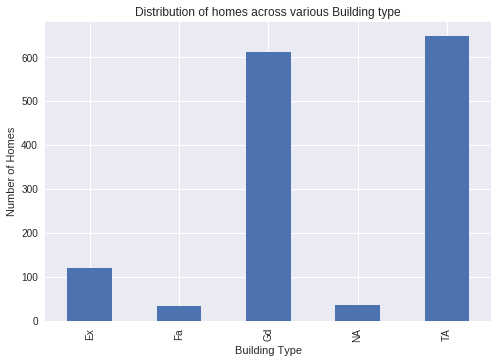

In [72]:
df.groupby('BsmtQual').count().iloc[:,1].plot(kind='bar')
plt.xlabel("Building Type")
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

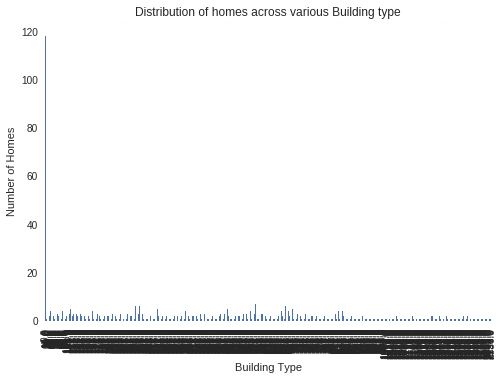

In [73]:
df.groupby('BsmtUnfSF').count().iloc[:,1].plot(kind='bar')
plt.xlabel("Building Type")
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

In [74]:
sns.distplot(np.log(df['SalePrice']))

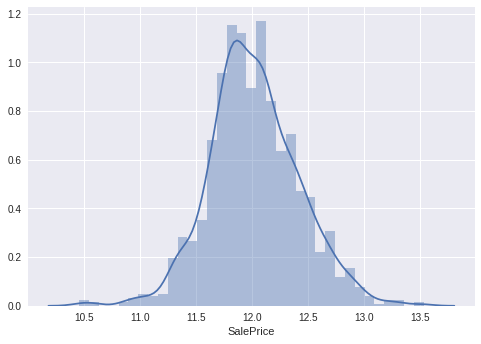

In [75]:
plt.show()

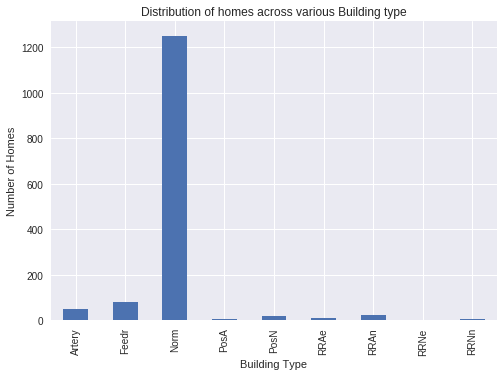

In [76]:
df.groupby('Condition1').count().iloc[:,1].plot(kind='bar')
plt.xlabel("Building Type")
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

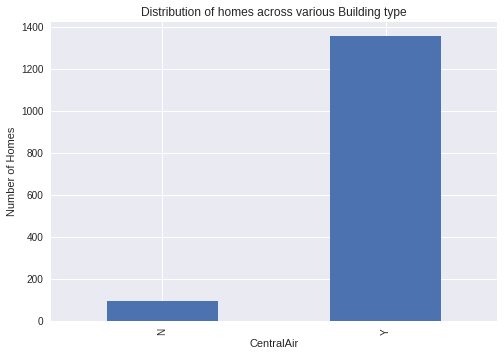

In [77]:
df.groupby(df.columns[12]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[12])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

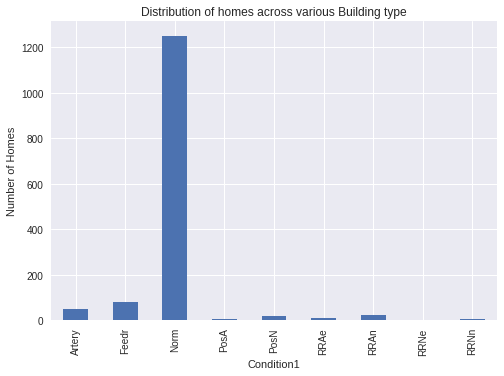

In [78]:
df.groupby(df.columns[13]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[13])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

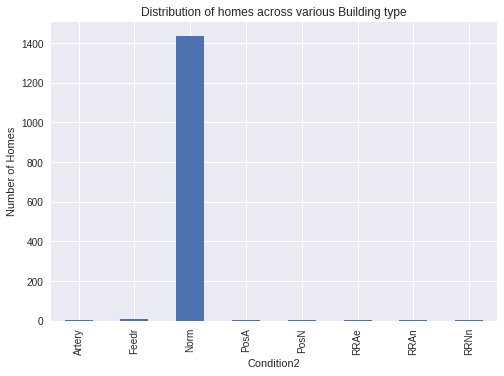

In [79]:
df.groupby(df.columns[14]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[14])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

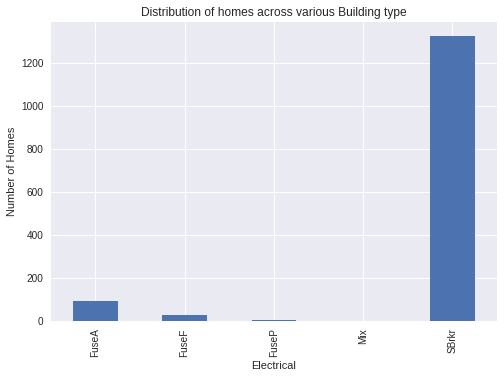

In [80]:
df.groupby(df.columns[15]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[15])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

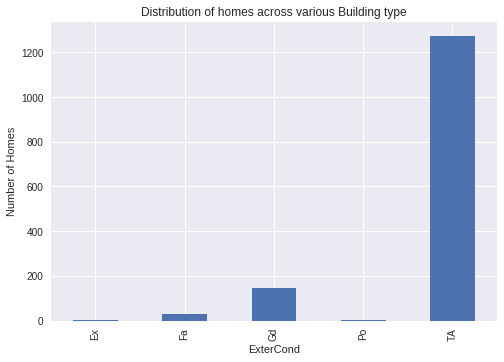

In [81]:
df.groupby(df.columns[17]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[17])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

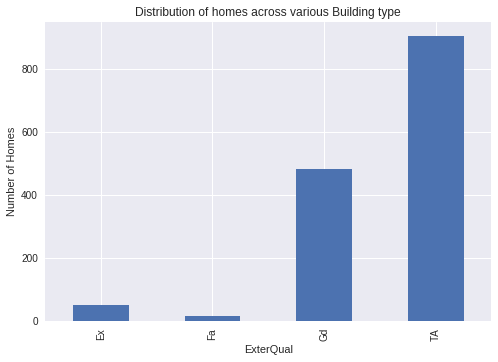

In [82]:
df.groupby(df.columns[18]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[18])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

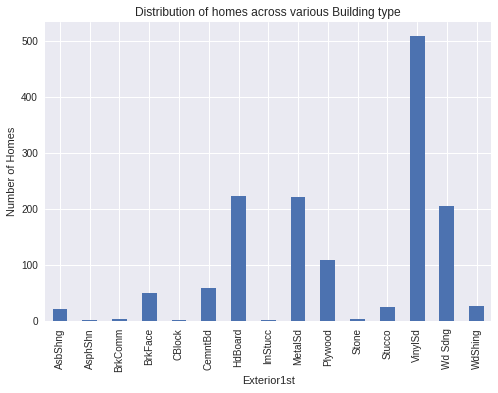

In [83]:
df.groupby(df.columns[19]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[19])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

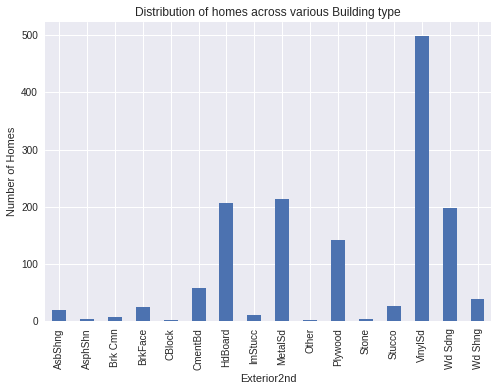

In [84]:
df.groupby(df.columns[20]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[20])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

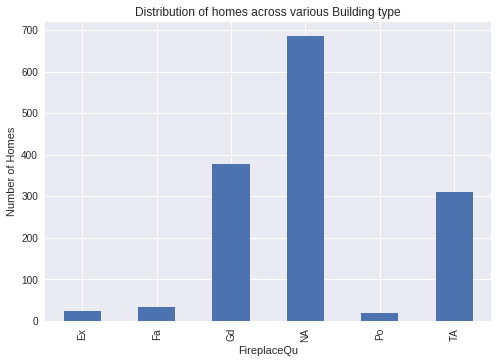

In [85]:
df.groupby(df.columns[21]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[21])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

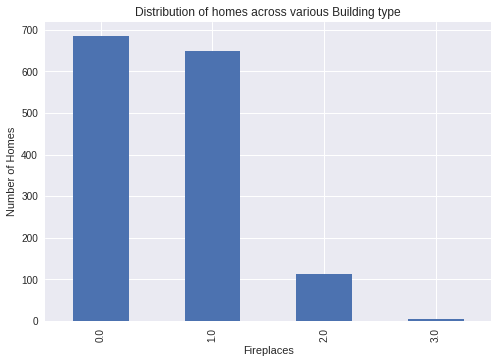

In [86]:
df.groupby(df.columns[22]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[22])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

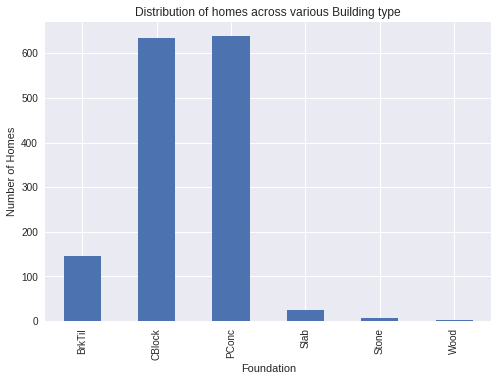

In [87]:
df.groupby(df.columns[23]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[23])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

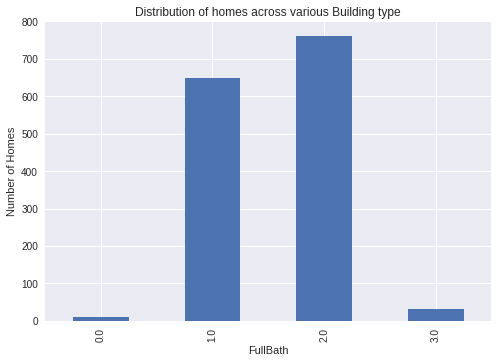

In [88]:
df.groupby(df.columns[24]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[24])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

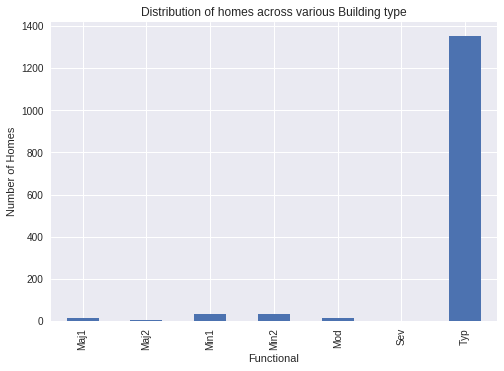

In [89]:
df.groupby(df.columns[25]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[25])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

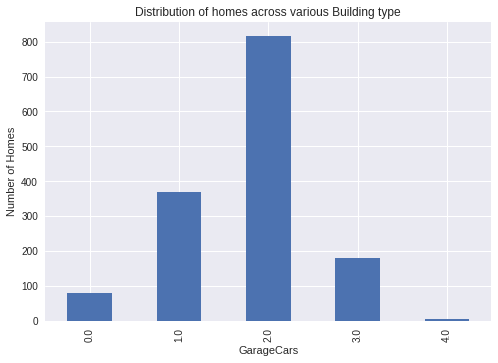

In [90]:
df.groupby(df.columns[27]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[27])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

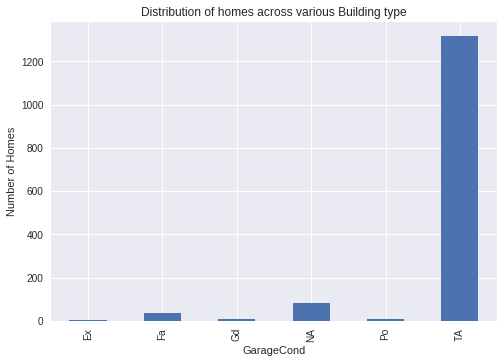

In [91]:
df.groupby(df.columns[28]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[28])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

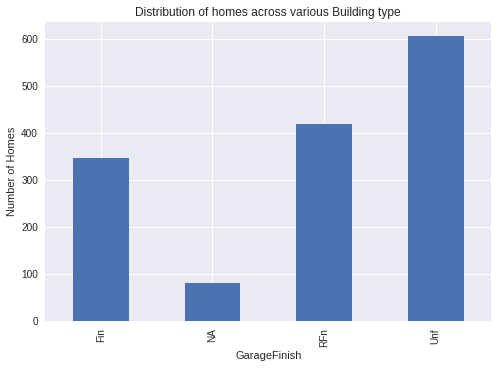

In [92]:
df.groupby(df.columns[29]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[29])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

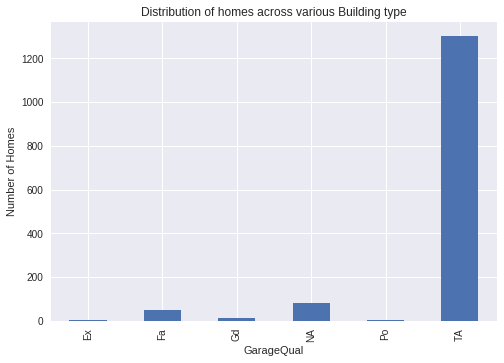

In [93]:
df.groupby(df.columns[30]).count().iloc[:,1].plot(kind='bar')
plt.xlabel(df.columns[30])
plt.ylabel("Number of Homes")
plt.title("Distribution of homes across various Building type")
plt.show()

In [94]:
import pyspark.mllib
import pyspark.mllib.regression
from pyspark.mllib.regression import LabeledPoint
from pyspark.sql.functions import * 

In [95]:
len(indexed_df.columns)#BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtFullBath,BsmtHalfBath,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,Heating,HeatingQC,HouseStyle,Id,KitchenQual,LandContour,LotConfig,LotShape

109

In [96]:
drop_list=['LotFrontage','BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFullBath','BsmtFullBath','BsmtHalfBath','BsmtQual','CentralAir','Condition1','Condition2','Electrical','ExterCond','ExterQual','Exterior1st','Exterior2nd','FireplaceQu','Foundation','Functional','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt','Heating','HeatingQC','HouseStyle','Id','KitchenQual','LandContour','LotConfig','LotShape','MasVnrType','Neighborhood','PavedDrive','RoofMatl','SaleType','YearBuilt','YearRemodAdd','YrSold']

In [97]:
temp_df=indexed_df.select([column for column in indexed_df.columns if column not in drop_list])

In [98]:
x=temp_df.columns

In [99]:
x.pop(27)

'firstFlrSF'

In [100]:
x=['SalePrice']+x

In [101]:
temp_df=temp_df.select(x)

In [102]:
temp_df.toPandas()

,SalePrice,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,...,LotShape_categorical,MSZoning_categorical,MasVnrType_categorical,Neighborhood_categorical,PavedDrive_categorical,RoofMatl_categorical,SaleType_categorical,YearBuilt_categorical,YearRemodAdd_categorical,YrSold_categorical
0,214000.0,3.0,1162,0.0,426.0,0.0,0.0,2.0,472.0,2.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,12.0,2.0
1,276000.0,3.0,0,0.0,1482.0,0.0,1.0,2.0,868.0,3.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,3.0,2.0,1.0
2,135000.0,3.0,902,0.0,196.0,0.0,0.0,1.0,260.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,50.0,3.0
3,294000.0,3.0,125,1031.0,36.0,0.0,2.0,2.0,518.0,2.0,...,1.0,0.0,0.0,22.0,0.0,0.0,0.0,53.0,6.0,1.0
4,134000.0,3.0,874,0.0,268.0,0.0,1.0,1.0,528.0,2.0,...,0.0,1.0,0.0,20.0,0.0,0.0,0.0,5.0,13.0,1.0
5,137000.0,4.0,0,0.0,1020.0,112.0,0.0,2.0,440.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,32.0,0.0,2.0
6,227000.0,3.0,643,0.0,167.0,0.0,0.0,2.0,528.0,2.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,22.0,19.0,0.0
7,264132.0,2.0,0,0.0,1498.0,0.0,1.0,2.0,592.0,2.0,...,1.0,0.0,2.0,4.0,0.0,0.0,1.0,16.0,8.0,3.0
8,236000.0,3.0,750,0.0,300.0,0.0,1.0,2.0,574.0,2.0,...,0.0,0.0,1.0,9.0,0.0,0.0,0.0,30.0,18.0,4.0
9,86000.0,2.0,348,0.0,180.0,144.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,7.0,7.0,1.0


In [103]:
#temp = temp_df.map(lambda line: LabeledPoint(line[0],[line[1:]]))

In [104]:
def func(line):
    x=Row(line)
    print(LabeledPoint(x[1]))

In [105]:
temp_df.map(func)

PythonRDD[1430] at RDD at PythonRDD.scala:43

In [106]:
from pyspark.sql.functions import expr

temp_df=temp_df.withColumn("BsmtFinSF1", expr("CAST(BsmtFinSF1 AS FLOAT)"))
temp_df=temp_df.withColumn("LowQualFinSF", expr("CAST(LowQualFinSF AS FLOAT)"))
temp_df=temp_df.withColumn("MSSubClass", expr("CAST(MSSubClass AS FLOAT)"))
temp_df=temp_df.withColumn("MSZoning", expr("CAST(MSZoning AS FLOAT)"))
temp_df=temp_df.withColumn("MasVnrArea", expr("CAST(MasVnrArea AS FLOAT)"))
temp_df=temp_df.withColumn("MoSold", expr("CAST(MoSold AS FLOAT)"))
temp_df=temp_df.withColumn("OverallCond", expr("CAST(OverallCond AS FLOAT)"))
temp_df=temp_df.withColumn("OverallQual", expr("CAST(OverallQual AS FLOAT)"))



In [107]:
temp.toPandas()['SaleType'].head()

0     WD
1    New
2     WD
3     WD
4     WD
Name: SaleType, dtype: object

In [108]:
from numpy import array
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import DecisionTree

#model = DecisionTree.trainReg(sc.parallelize(data), 2, {})

#DecisionTreeModel classifier of depth 1 with 3 nodes

In [109]:
model=DecisionTree.trainRegressor(sc.parallelize(temp),2,{})

Py4JError: An error occurred while calling o1833.__getnewargs__. Trace:
py4j.Py4JException: Method __getnewargs__([]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:335)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:344)
	at py4j.Gateway.invoke(Gateway.java:252)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)



In [110]:
temp_df.columns

['SalePrice',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'LotArea',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'secondFlrSF',
 'threeSsnPorch',
 'BldgType_categorical',
 'BsmtCond_categorical',
 'BsmtExposure_categorical',
 'BsmtFinType1_categorical',
 'BsmtFinType2_categorical',
 'BsmtQual_categorical',
 'CentralAir_categorical',
 'Condition1_categorical',
 'Condition2_categorical',
 'Electrical_categorical',
 'ExterCond_categorical',
 'ExterQual_categorical',
 'Exterior1st_categorical',
 'Exterior2nd_categorical',
 'FireplaceQu_categorical',
 'Foundation_categorical',
 'Functional_categorical',
 'GarageCond_categorical',
 'GarageFinish_categorical',
 'GarageQual_categorical',
 'GarageTyp

In [111]:
strcols=[]
for i in range(0,len(temp_df.columns)):
    if (temp_df.dtypes[i][1]=='string'):
        strcols.append(temp_df.dtypes[i][0])
        

In [112]:
strcols

[]

In [113]:
temp_df.toPandas().head()

,SalePrice,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,...,LotShape_categorical,MSZoning_categorical,MasVnrType_categorical,Neighborhood_categorical,PavedDrive_categorical,RoofMatl_categorical,SaleType_categorical,YearBuilt_categorical,YearRemodAdd_categorical,YrSold_categorical
0,214000.0,3.0,1162.0,0.0,426.0,0.0,0.0,2.0,472.0,2.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,12.0,2.0
1,276000.0,3.0,0.0,0.0,1482.0,0.0,1.0,2.0,868.0,3.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,3.0,2.0,1.0
2,135000.0,3.0,902.0,0.0,196.0,0.0,0.0,1.0,260.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,50.0,3.0
3,294000.0,3.0,125.0,1031.0,36.0,0.0,2.0,2.0,518.0,2.0,...,1.0,0.0,0.0,22.0,0.0,0.0,0.0,53.0,6.0,1.0
4,134000.0,3.0,874.0,0.0,268.0,0.0,1.0,1.0,528.0,2.0,...,0.0,1.0,0.0,20.0,0.0,0.0,0.0,5.0,13.0,1.0


In [114]:
len(temp_df.columns)

68

In [121]:
l,drop_list

(['LandSlope',
  'KitchenAbvGr',
  'MiscFeature',
  'Utilities',
  'PoolQC',
  'Fence',
  'SaleCondition',
  'Alley',
  'RoofStyle',
  'Street'],
 ['LotFrontage',
  'BldgType',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'BsmtFullBath',
  'BsmtFullBath',
  'BsmtHalfBath',
  'BsmtQual',
  'CentralAir',
  'Condition1',
  'Condition2',
  'Electrical',
  'ExterCond',
  'ExterQual',
  'Exterior1st',
  'Exterior2nd',
  'FireplaceQu',
  'Foundation',
  'Functional',
  'GarageCond',
  'GarageFinish',
  'GarageQual',
  'GarageType',
  'GarageYrBlt',
  'Heating',
  'HeatingQC',
  'HouseStyle',
  'Id',
  'KitchenQual',
  'LandContour',
  'LotConfig',
  'LotShape',
  'MasVnrType',
  'Neighborhood',
  'PavedDrive',
  'RoofMatl',
  'SaleType',
  'YearBuilt',
  'YearRemodAdd',
  'YrSold'])

In [124]:
set(indexed_df.columns)-set(drop_list)

{'BedroomAbvGr',
 'BldgType_categorical',
 'BsmtCond_categorical',
 'BsmtExposure_categorical',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1_categorical',
 'BsmtFinType2_categorical',
 'BsmtQual_categorical',
 'BsmtUnfSF',
 'CentralAir_categorical',
 'Condition1_categorical',
 'Condition2_categorical',
 'Electrical_categorical',
 'EnclosedPorch',
 'ExterCond_categorical',
 'ExterQual_categorical',
 'Exterior1st_categorical',
 'Exterior2nd_categorical',
 'FireplaceQu_categorical',
 'Fireplaces',
 'Foundation_categorical',
 'FullBath',
 'Functional_categorical',
 'GarageArea',
 'GarageCars',
 'GarageCond_categorical',
 'GarageFinish_categorical',
 'GarageQual_categorical',
 'GarageType_categorical',
 'GarageYrBlt_categorical',
 'GrLivArea',
 'HalfBath',
 'HeatingQC_categorical',
 'Heating_categorical',
 'HouseStyle_categorical',
 'KitchenQual_categorical',
 'LandContour_categorical',
 'LotArea',
 'LotConfig_categorical',
 'LotShape_categorical',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning